In [1]:
# Just to ignore warnings
import warnings
warnings.filterwarnings('ignore')
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sklearn as sk
#preprocessing module
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing

In [3]:
df = pd.read_csv("winequality-red.csv", sep=',')
df.columns
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
x=df.drop("quality", axis=1) #if you want to drop a column axis=1, else it uses axis=0 for row 
y=df.quality

In [5]:
x=df[["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
       "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
       "pH", "sulphates", "alcohol" ]]
x=preprocessing.scale(x)


y=df["quality"]

y=preprocessing.normalize([y])
print(y.shape)
#scale(df[])


x_train, x_test, y_train, y_test = train_test_split(x, y[0], test_size=0.2, random_state=10)

#[("LR",LinearRegression()), ("KNR", KNeighborsRegressor(n_neighbors=10)), ("RFR", RandomForestRegressor(n_estimators=1000, random_state=0)), 
#        ("DTC", DecisionTreeRegressor(random_state=0)), ("SVR", SVR())]
model_all = [LinearRegression(), KNeighborsRegressor(n_neighbors=10), RandomForestRegressor(n_estimators=1000, random_state=10), 
            DecisionTreeRegressor(random_state=0), SVR()]
         
for model in model_all:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(r2_score(y_test, y_pred))
    model=None

(1, 1599)
0.3707576574165463
0.3447904777433557
0.47924844611119966
-0.021794662753410243
-0.052231099516278245


In [17]:
x=df[["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
       "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
       "pH", "sulphates", "alcohol" ]]
x=preprocessing.scale(x)


y=df["quality"]

y=preprocessing.normalize([y])
print(y.shape)
#scale(df[])


x_train, x_test, y_train, y_test = train_test_split(x, y[0], test_size=0.2, random_state=10)
from sklearn.metrics import r2_score, mean_squared_error
RF = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_train, y_train)
y_pred = RF.predict(x_test) 
RF_r2 = r2_score(y_test, y_pred)
RF_MSE = mean_squared_error (y_test, y_pred)

print("R2 score:", RF_r2)
print("MSE:", RF_MSE)




(1, 1599)
R2 score: 0.4650252731126697
MSE: 7.417760302118296e-06


In [7]:
err_rate = [] #Using Elbow method, find the best value of K

for i in range(1,1000):
    RF = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_train, y_train)
    y_pred_i = RF.predict(x_test)
    err_rate.append(np.mean(y_pred_i !=y_test))

Text(0, 0.5, 'Error_Rate')

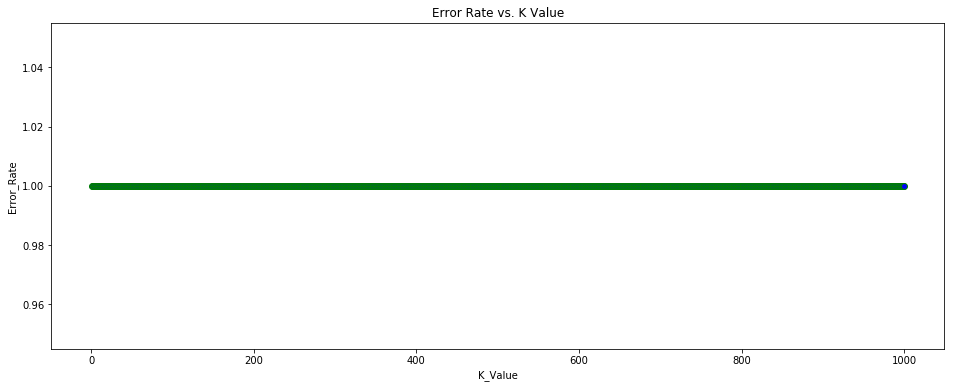

In [8]:
plt.figure(figsize=(16,6))
plt.plot(range(1,1000),err_rate,color='green',marker='o',markerfacecolor='blue')
plt.title('Error Rate vs. K Value')
plt.xlabel('K_Value')
plt.ylabel('Error_Rate')

In [9]:
#from sklearn.metrics import accuracy_score, confusion_matrix
#from sklearn.metrics import classification_report, confusion_matrix # do the train_test split
#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))



In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
print(StandardScaler)

from sklearn.preprocessing import scale
x_train_scale= scale(x_train)
print(x_train_scale)
x_test_scale= scale(x_test)

<class 'sklearn.preprocessing.data.StandardScaler'>
[[-1.35121517 -0.08578674 -1.41742086 ...  1.52397193  1.51173262
   0.28631545]
 [ 0.16067276 -0.59414769  0.61052688 ...  0.27210289  0.16555338
   1.23854945]
 [-0.59527121  0.76148152 -1.41742086 ...  1.98518684  1.68000502
  -0.47547176]
 ...
 [-0.76971981 -0.82008589  1.13051348 ...  0.53565426  0.61427979
   0.95287925]
 [ 0.97476626 -0.98953954  1.02651616 ... -0.51855124 -0.78799024
   1.52421965]
 [-0.76971981  0.42257421  0.14253894 ... -0.05733633  2.85791185
  -0.18980155]]


In [11]:
#models=[("LR",LogisticRegression()), ("DTC", DecisionTreeClassifier()), 
#        ("KNC", KNeighborsClassifier()), ("SVC", SVC()), ("GNB", GaussianNB()), 
#        ("RFC", RandomForestClassifier())]

x=df[["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
       "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
       "pH", "sulphates", "alcohol" ]]
x=preprocessing.scale(x)


y=df["quality"]

#y=preprocessing.normalize([y])
print(y.shape)
#scale(df[])


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model_all = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), 
        DecisionTreeClassifier(), SVC()]
         

for model in model_all:
    #print(y_train)
    #print(np.unique(y_train))
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(score)
    model=None


(1599,)
0.628125
0.60625
0.7
0.659375
0.646875


In [12]:
#from sklearn.metrics import classification_report, confusion_matrix # do the train_test split
#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

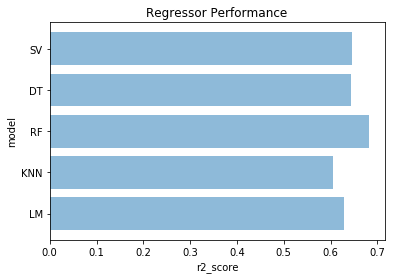

In [13]:
objects = ('LM', 'KNN', 'RF', 'DT', 'SV')
y_pos = np.arange(len(objects))
performance = [0.628, 0.606, 0.681, 0.643, 0.646]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.ylabel('model')
plt.xlabel('r2_score')
plt.title('Regressor Performance')

plt.show()

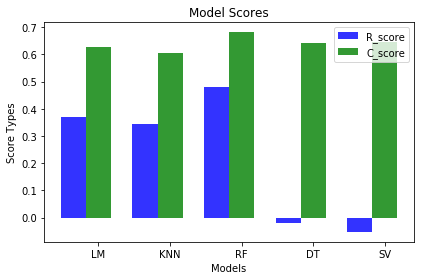

In [15]:
n_groups = 5
performance_reg = (0.370, 0.344, 0.479, -0.021, -0.052)
performance_class = (0.628, 0.606, 0.681, 0.643, 0.646)


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, performance_reg, bar_width, alpha=opacity, color='b', label='R_score')

rects2 = plt.bar(index + bar_width, performance_class, bar_width, alpha=opacity, color='g', label='C_score')

plt.xlabel('Models')
plt.ylabel('Score Types')
plt.title('Model Scores')
plt.xticks(index + bar_width, ('LM', 'KNN', 'RF', 'DT', 'SV'))
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
df.quality.value_counts() 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64